In [3]:
import cupy as np
import matplotlib.pyplot as plt

In [4]:
W, H = 2560, 1440
xx, yy = np.meshgrid(np.linspace(0, 1, W), np.linspace(0, 1, H))

In [5]:
data = np.stack((xx.reshape(-1), yy.reshape(-1)), axis=-1)
data.shape

(3686400, 2)

In [10]:
A = np.random.normal(0.5, 0.9, size=(2, 10))
B = np.random.normal(-1, 6, size=(10, 50))
C = np.random.normal(0, 1, size=(50, 100))
D = np.random.normal(0, 0.1, size=(100, 3))

In [11]:
h = np.tanh

In [12]:
output = (np.sin(h(h(np.tan(data @ A) @ B) @ C) @ D)).reshape(H, W, 3) + 1 / 2
output = np.asnumpy(output)
output.shape

(1440, 2560, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


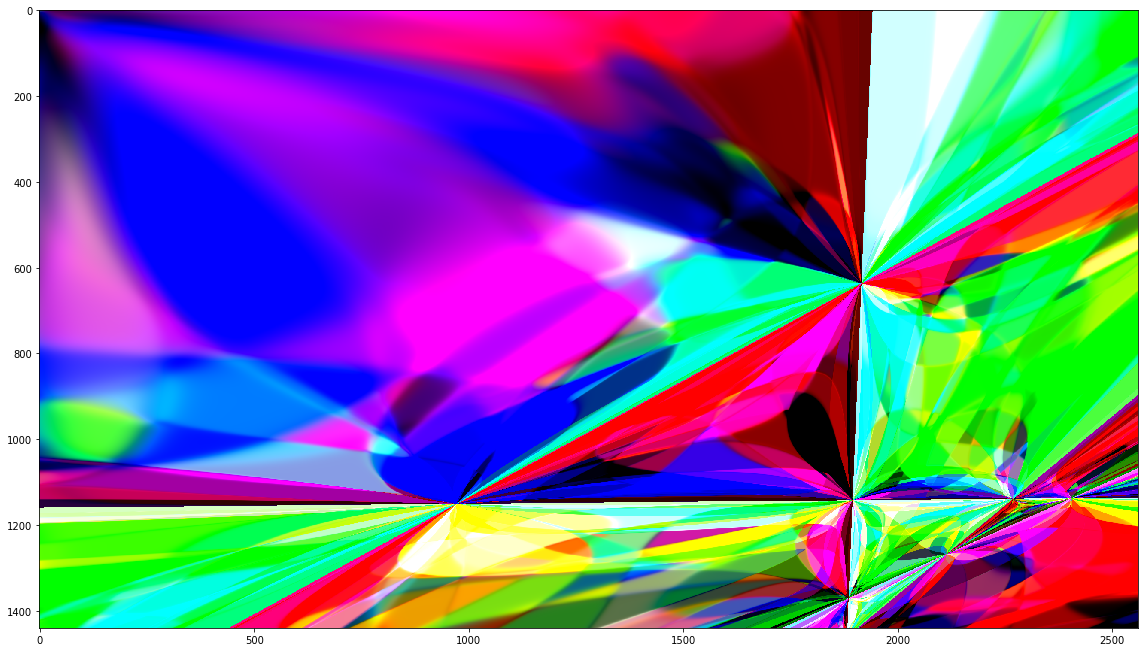

In [13]:
fig, ax = plt.subplots(figsize=(16, 16))
ax.imshow(output, interpolation='nearest', cmap='hot')
plt.tight_layout()

In [114]:
class ArtGenerator:
    def __init__(self, activation, descriptions):
        self.activation = activation
        self.descriptions = descriptions
        self.init()
        
    def init(self):
        self.layers = []
        prev_size = 2
        for mu, sig, size in self.descriptions:
            self.layers.append(
                np.random.normal(mu, sig, size=(prev_size, size))
            )
            prev_size = size
    
    # TODO: Add bias
    def generate(self, W, H):
        xx, yy = np.meshgrid(np.linspace(0, 1, W), np.linspace(0, 1, H))
        data = np.stack((xx.reshape(-1), yy.reshape(-1)), axis=-1)
        for layer in self.layers:
            data = self.activation(data @ layer)
            
        return np.asnumpy(data.reshape(H, W, -1))
    
    def plot(self, W, H, cols, rows, size):
        fig, axs = plt.subplots(cols, rows, figsize=(rows * size, cols * size))
        for ax in [ax for row in axs for ax in row]:
            self.init()
            img = self.generate(W, H)
            ax.imshow(img)
        
        plt.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

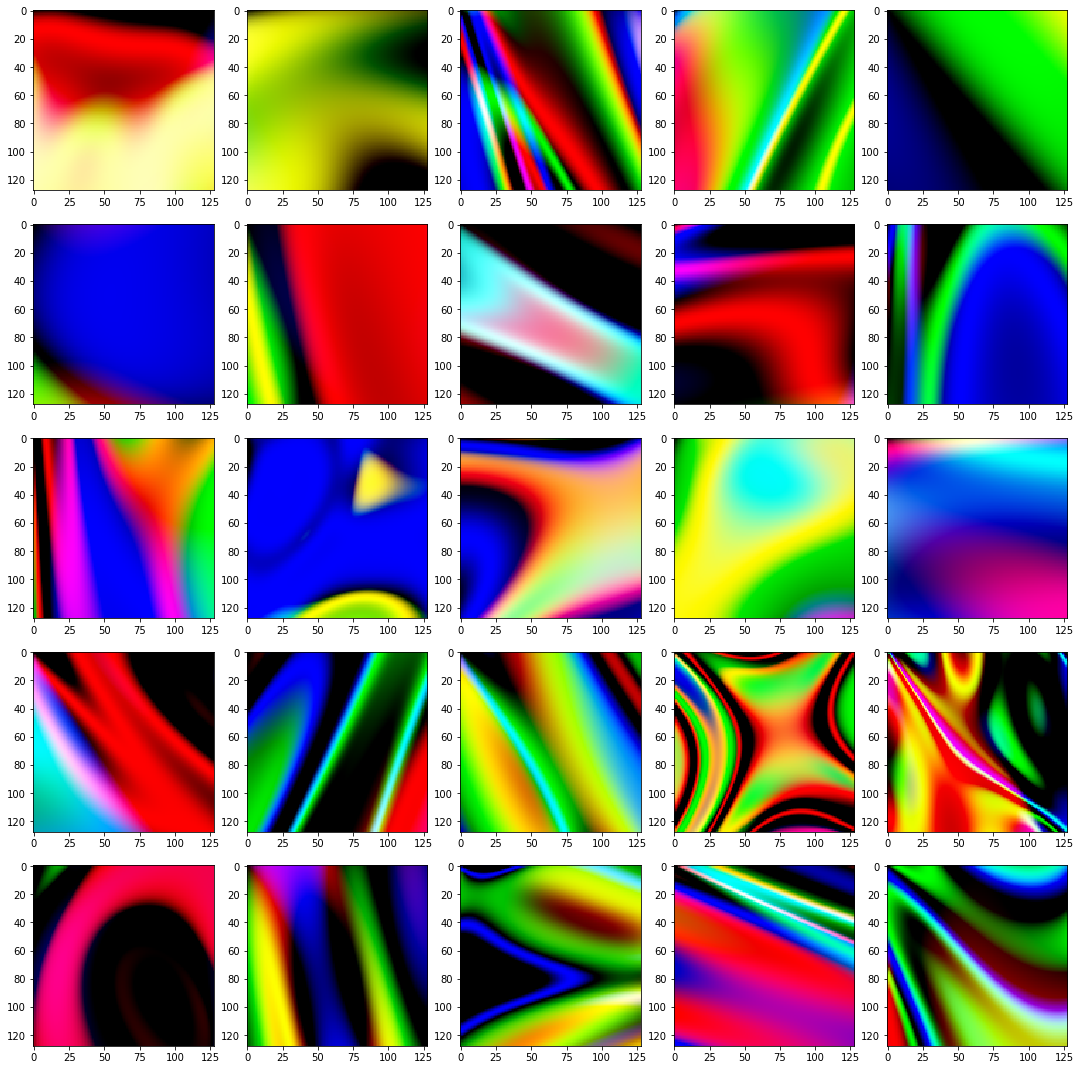

In [66]:
gen = ArtGenerator(np.sin, [
    (0, 0.2, 100),
    (0, 1, 3),
    (0, 0.6, 10),
    (0, 1, 3),
    (0, 1, 5),
    (1, 1.5, 3)
])
gen.plot(128, 128, 5, 5, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


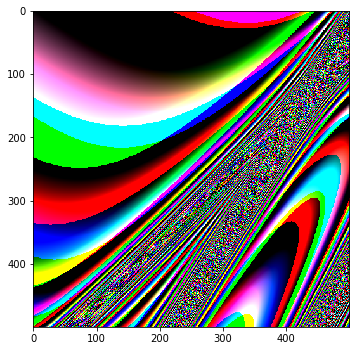

In [892]:
gen = ArtGenerator(np.tan, [
    (0, 1, 10),
    (1, 0.5, 3)
])
img  = gen.generate(500, 500)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(img, interpolation='nearest', cmap='hot')
plt.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


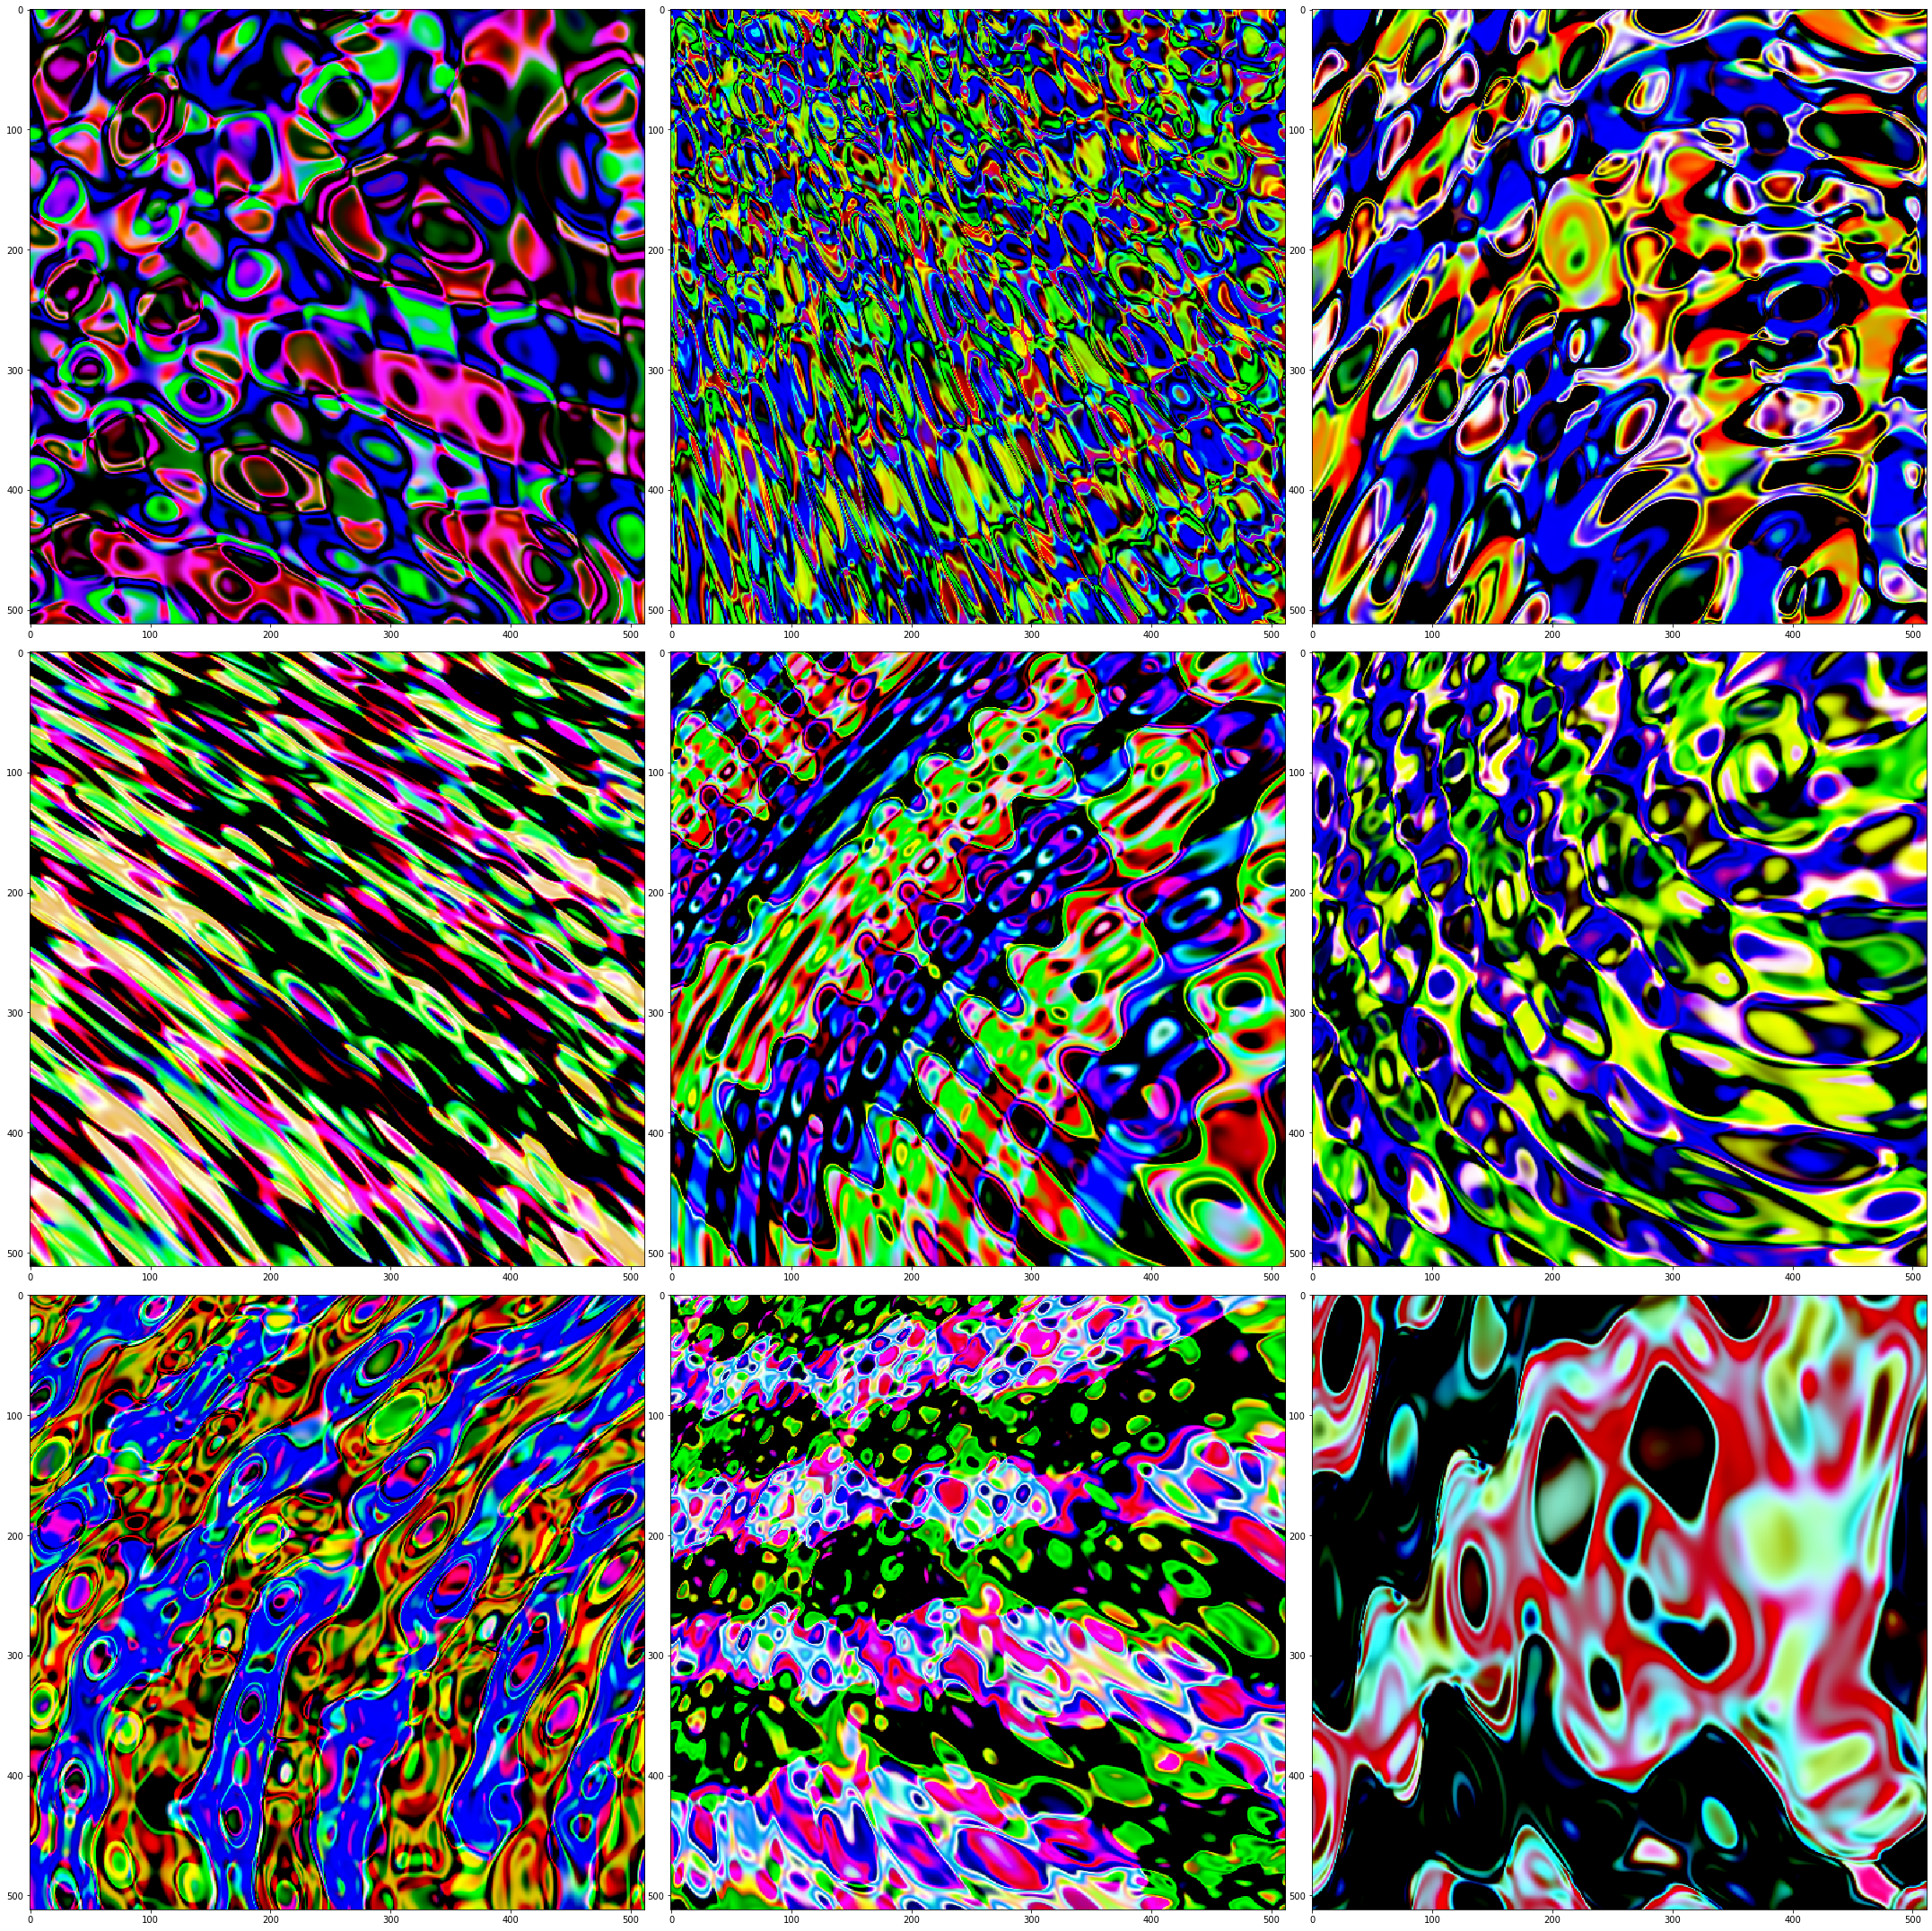

In [148]:
gen = ArtGenerator(np.sin, [
    (0, 0.8, 500),
    (0, 2, 5),
    (0, 1, 5),
    (0, 1, 5),
    (0, 1, 5),
    (0, 1, 3),
    (1, 1, 3)
])
gen.plot(512, 512, 3, 3, 10)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


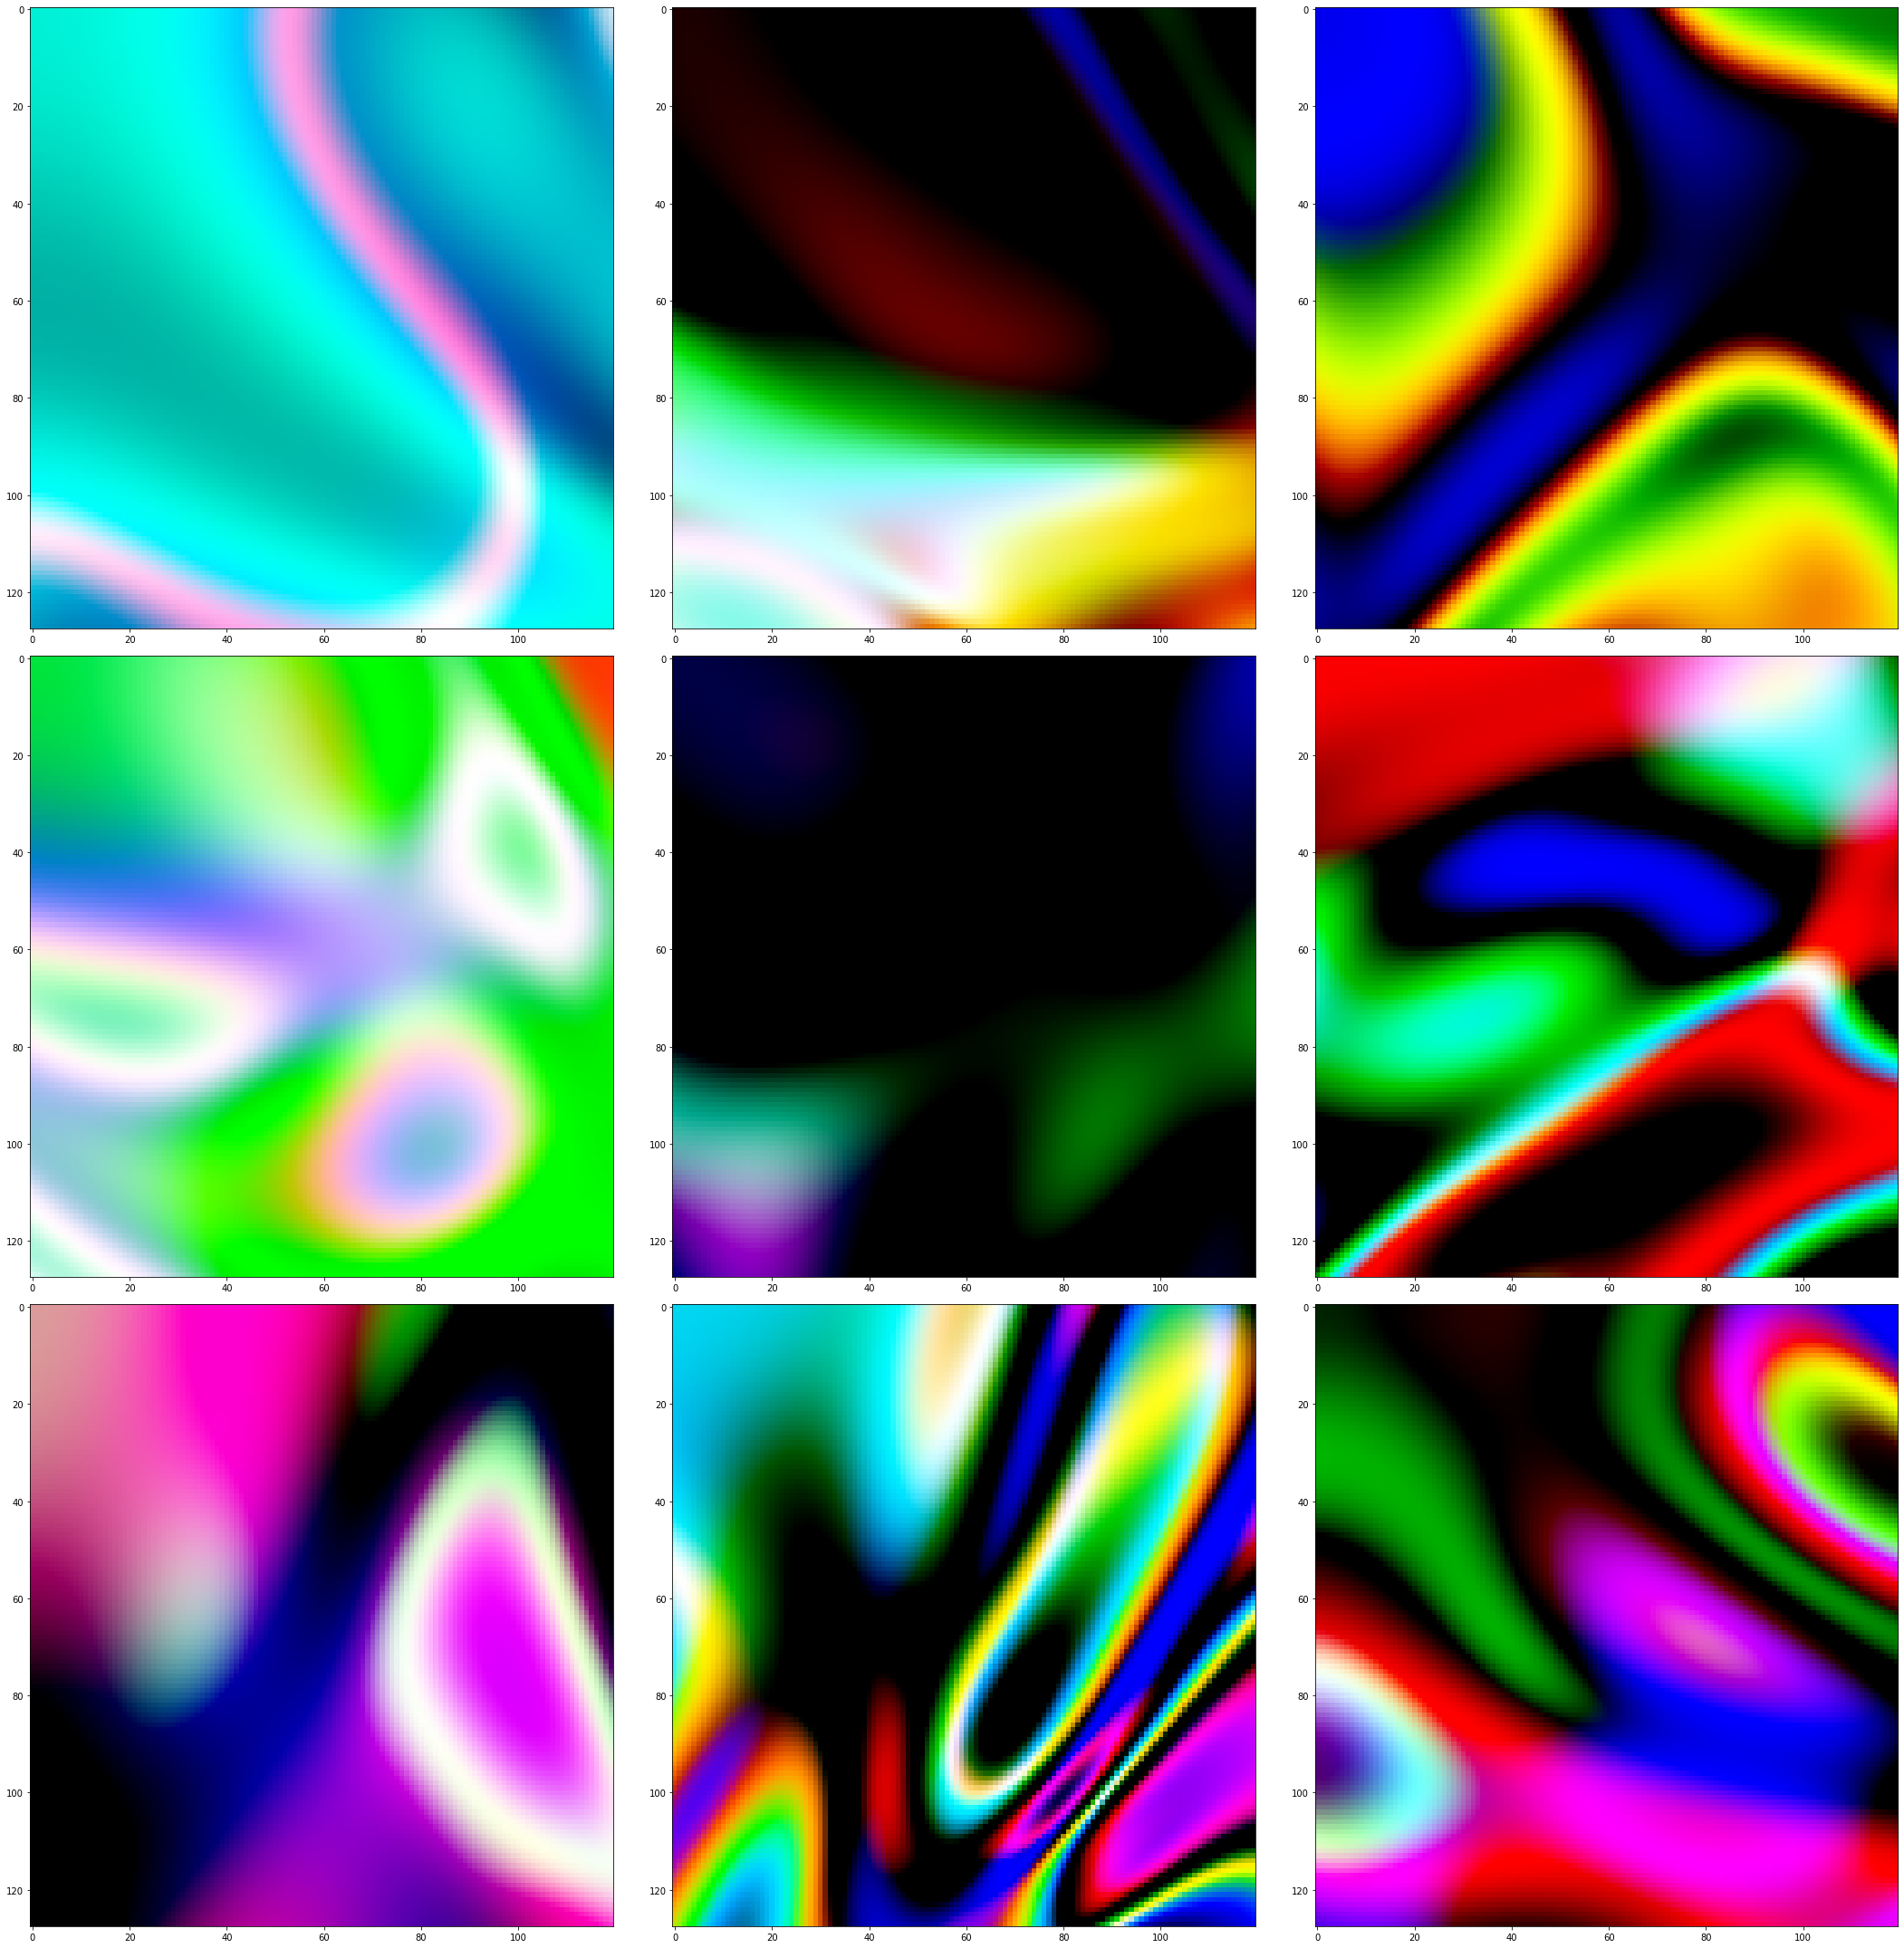

In [238]:
gen = ArtGenerator(np.cos, [
    (0, 0.8, 500),
    (0, 0.2, 5),
    (0, 1, 5),
    (0, 1, 3),
    (1, 1, 3)
])
gen.plot(120, 128, 3, 3, 10)